# Ensemble: tas

## Imports & defaults

In [1]:
import libs.analysis
import libs.ensemble
import libs.plot
import libs.utils
import matplotlib
import xarray

matplotlib.rcParams.update({ 'font.size': 18 })
xarray.set_options(keep_attrs=True)

/home/users/woodward/.conda/envs/climate/lib/python3.9/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


## Data

In [2]:
# ----- SPECIFIC SETTINGS -----
component = 'Amon'
experiment = 'ssp585'
variable_id = 'tas'

time_series_text = 'surface air temperature'
time_series_weighted_method = 'mean'
time_series_units = '°C'
time_series_y_label = f'Temperature ({time_series_units})'
time_series_y_range = (-20, 10)
time_series_y_range_full = (-30, 20)
time_series_y_range_monthly = (-30, 20)
time_series_process = lambda x: x

def preprocess(var_data, experiment, source_id, variant_label):
    # Convert K -> C
    var_data -= 273.15

    return var_data

In [8]:
ensemble, weight = libs.ensemble.get_and_preprocess(
    component, 
    experiment, 
    variable_id,
    preprocess=preprocess
)

# Generate slices
ensemble_time_slices = libs.analysis.generate_slices(ensemble)

ensemble_time_series = time_series_process(
    libs.local.get_ensemble_series(variable_id, experiment)
)
ensemble_time_series_smooth = time_series_process(
    libs.local.get_ensemble_series(variable_id, experiment, '_smooth')
)

## Time series

### Mean

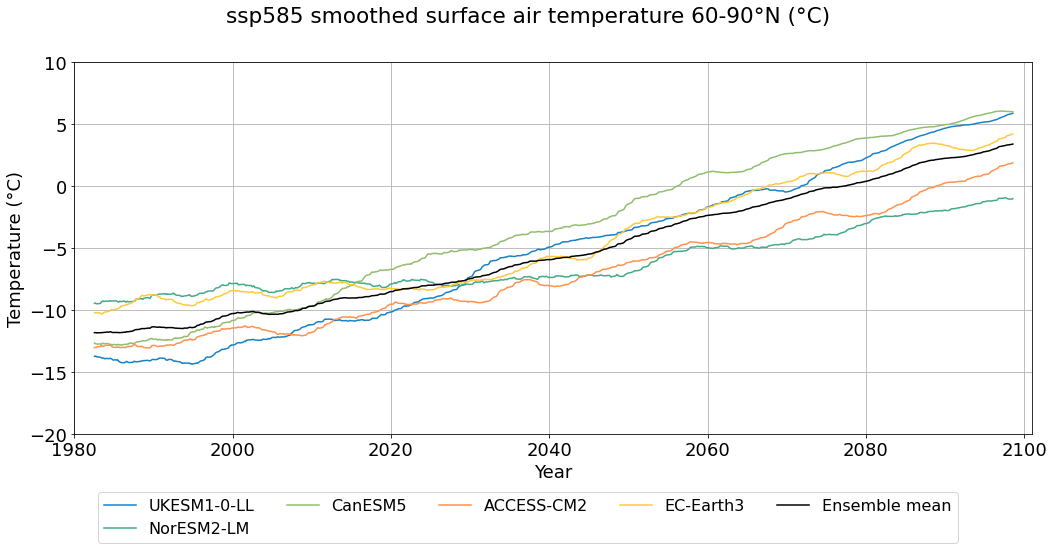

In [4]:
libs.plot.time_series_from_vars(
    ensemble_time_series_smooth,
    title=f'{experiment} smoothed {time_series_text} 60-90°N ({time_series_units})',
    xattr='time',
    ylabel=time_series_y_label,
    yrange=time_series_y_range
)

### Full variability

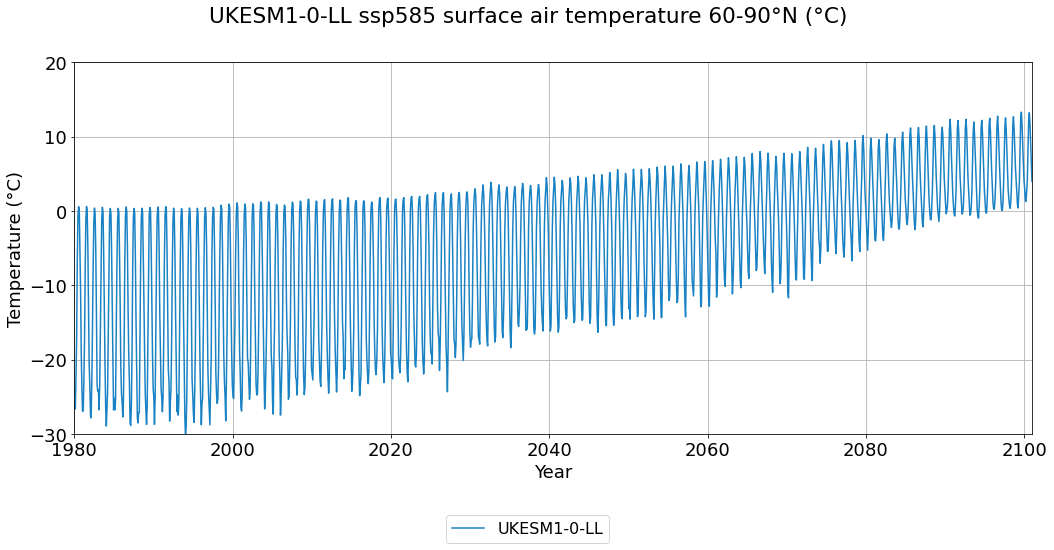

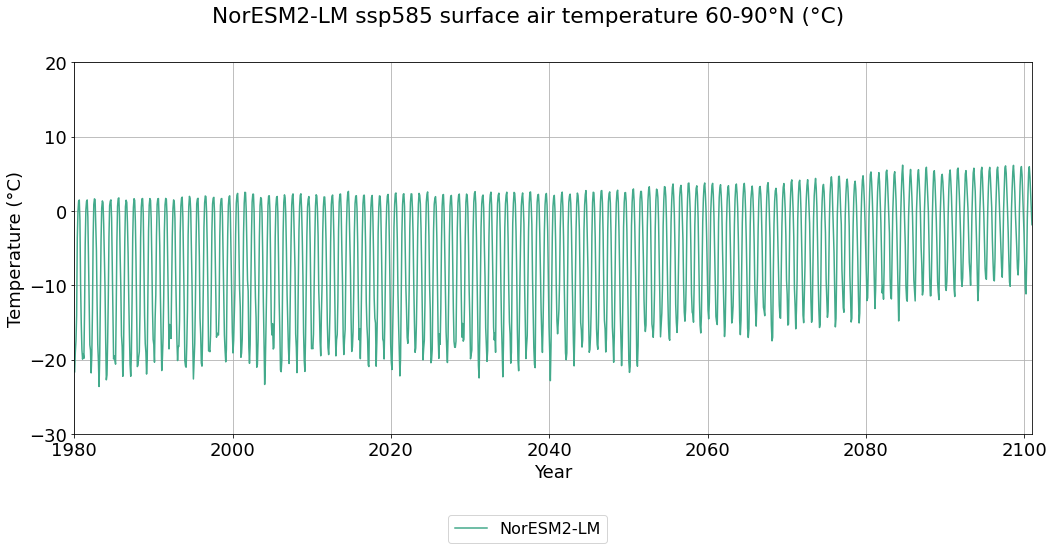

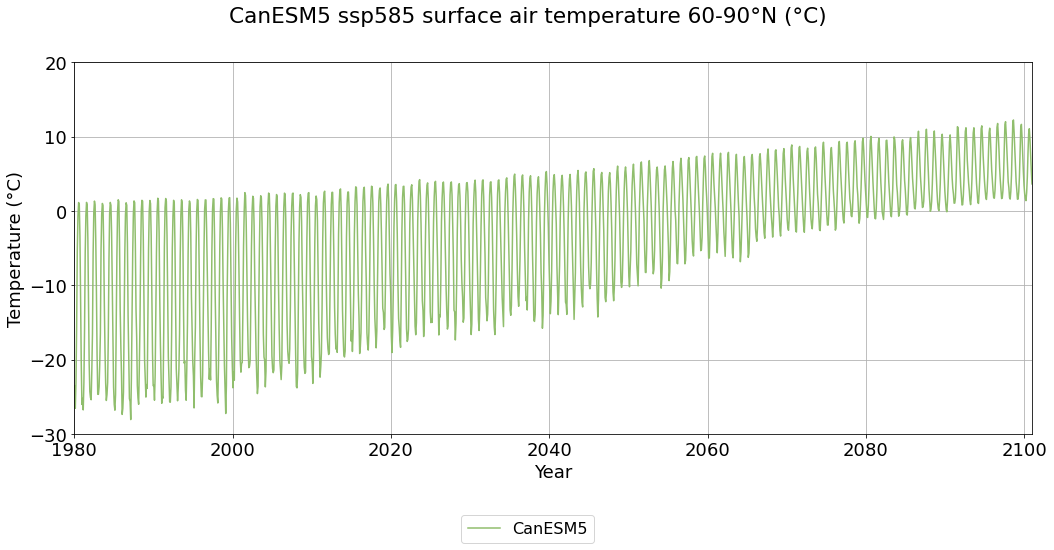

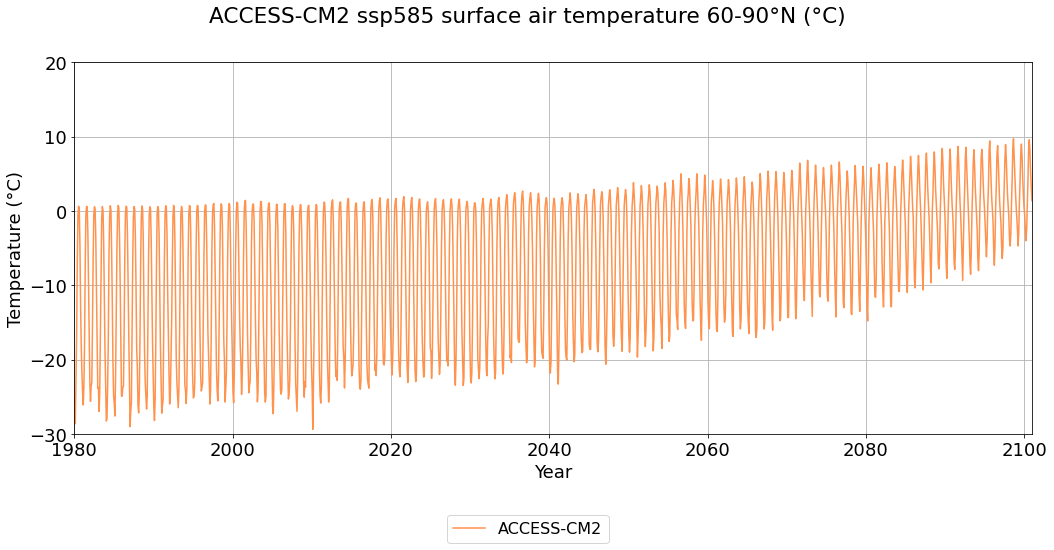

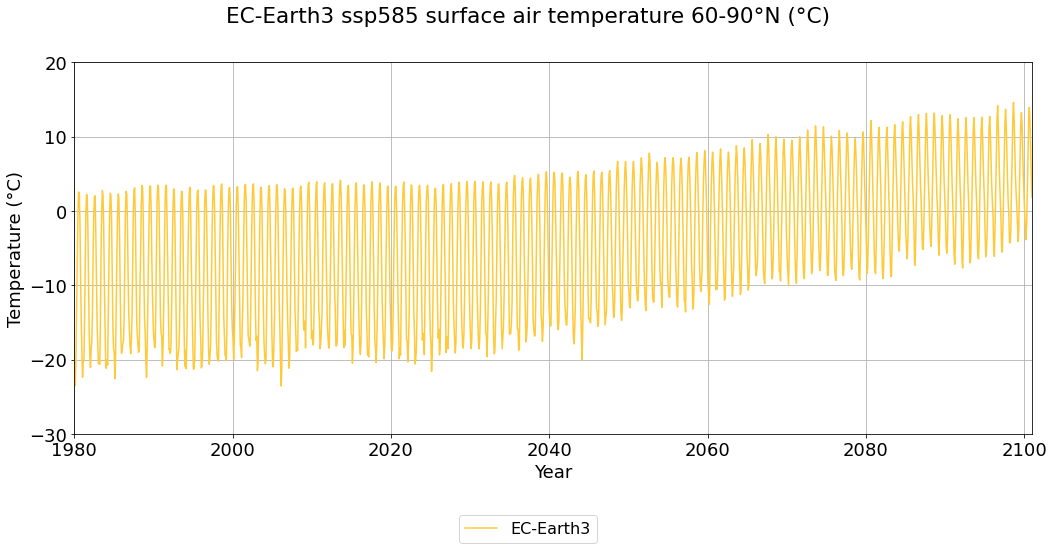

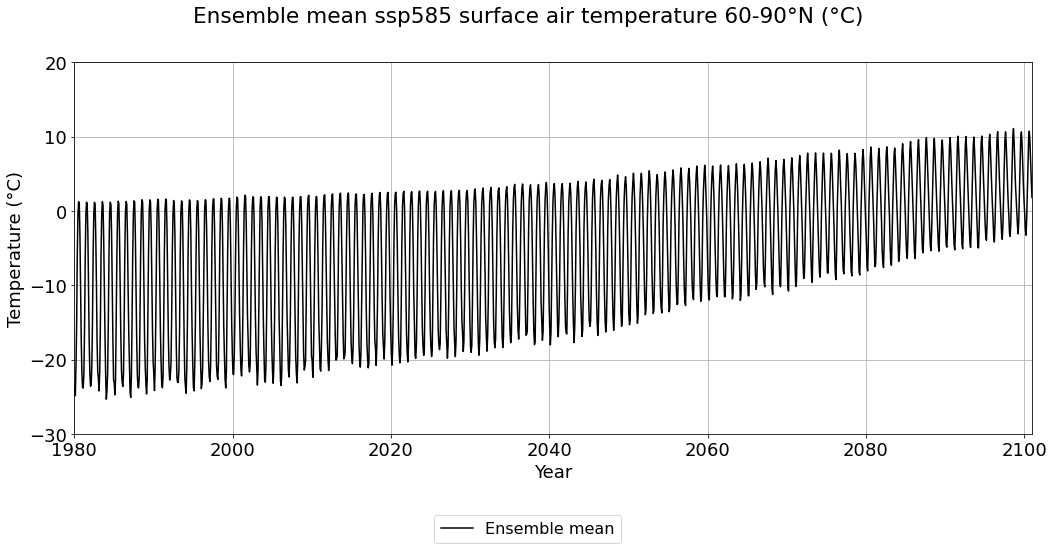

In [5]:
libs.ensemble.time_series_full_variability(
    ensemble_time_series,
    plot_kwargs={
        'title': f'{{member}} {experiment} {time_series_text} 60-90°N ({time_series_units})',
        'ylabel': time_series_y_label,
        'yrange': time_series_y_range_full
    }
)

## Monthly variability

### Full region (time)

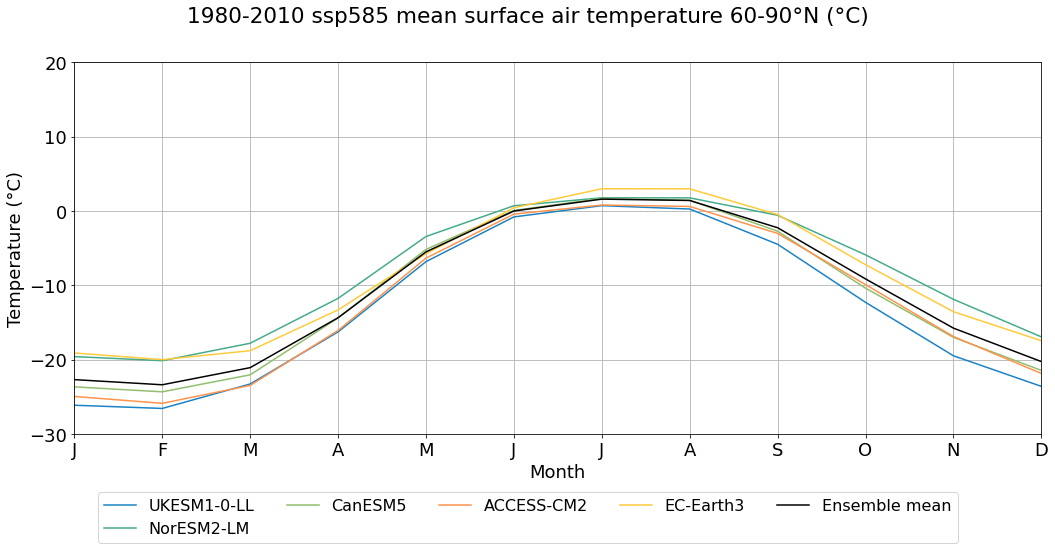

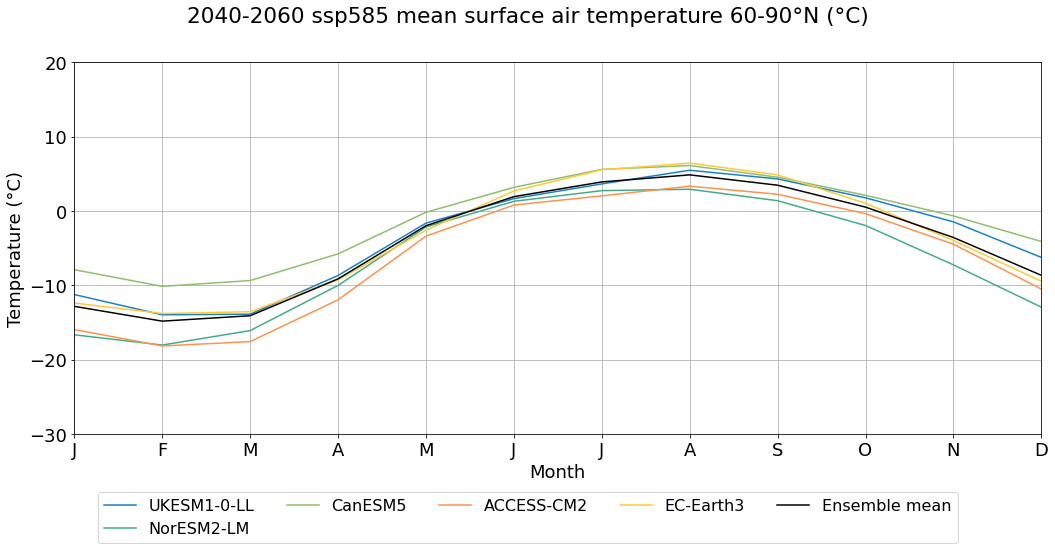

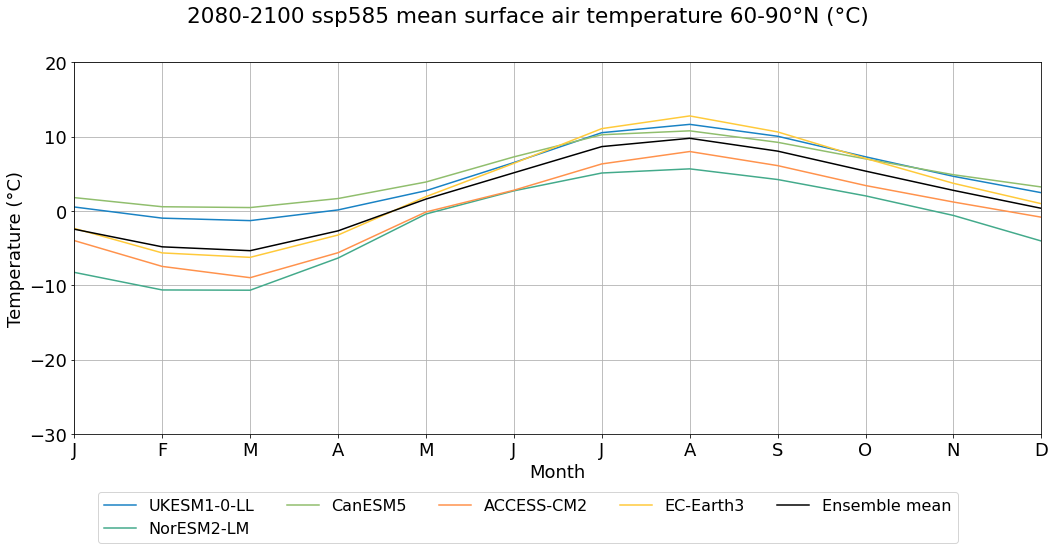

In [9]:
libs.ensemble.monthly_variability_full(
    ensemble_time_slices,
    plot_kwargs={
        'title': f'{{s_label}} {experiment} mean {time_series_text} 60-90°N ({time_series_units})',
        'ylabel': time_series_y_label,
        'yrange': time_series_y_range_monthly
    },
    weight=weight,
    weighting_method=time_series_weighted_method,
    weighting_process=time_series_process
)

### Regional (time)

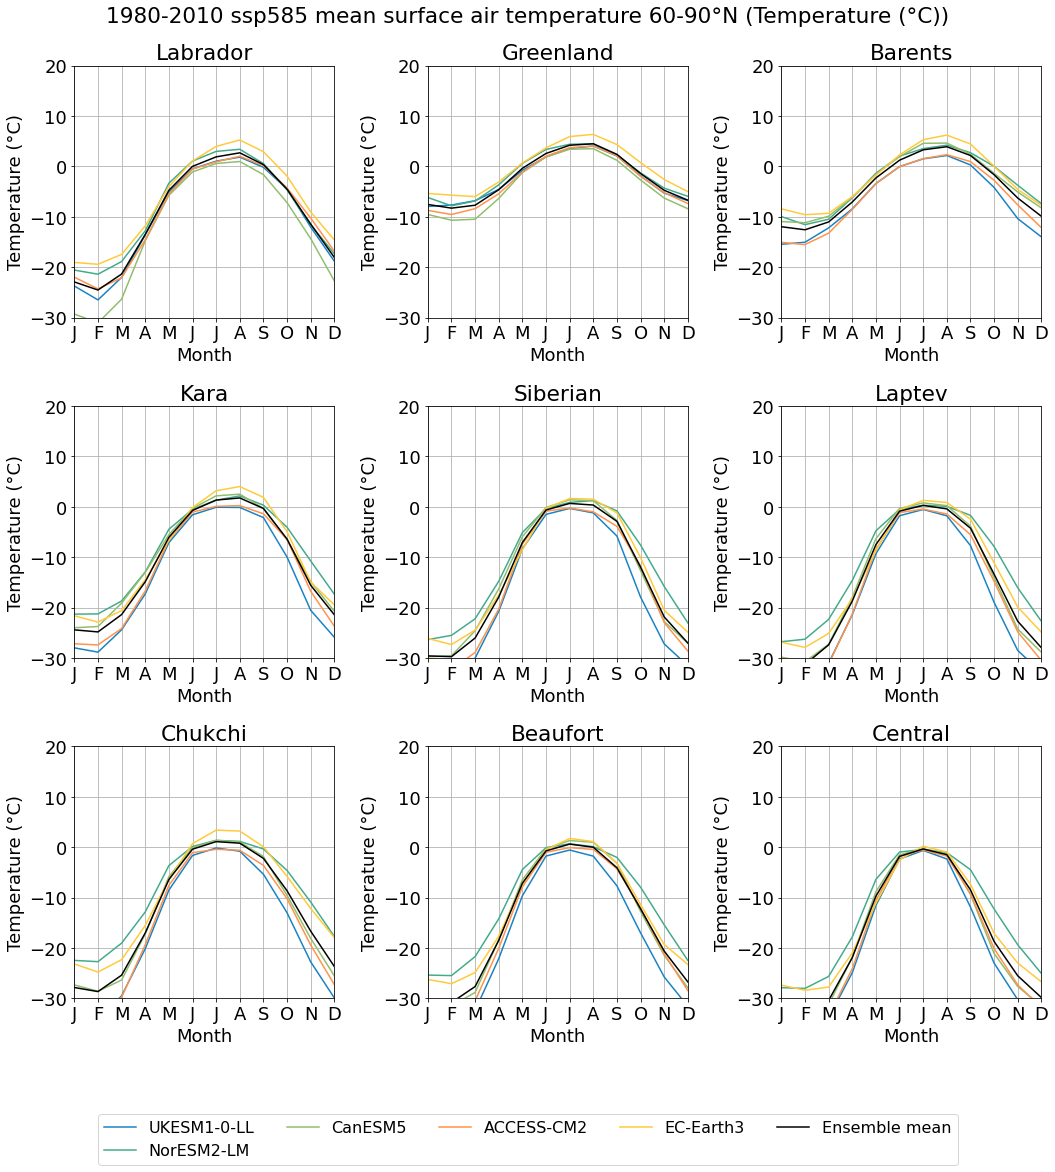

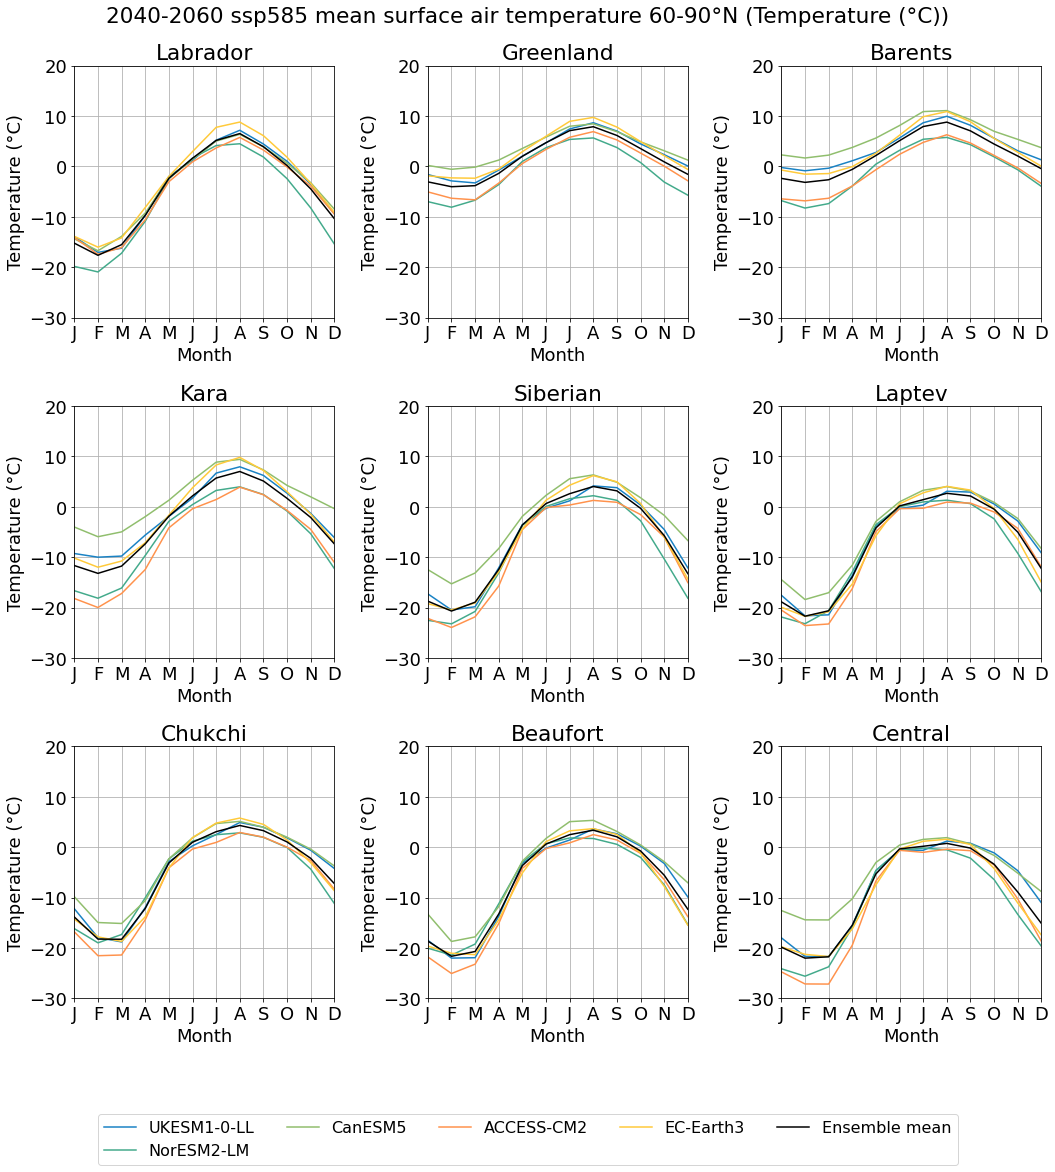

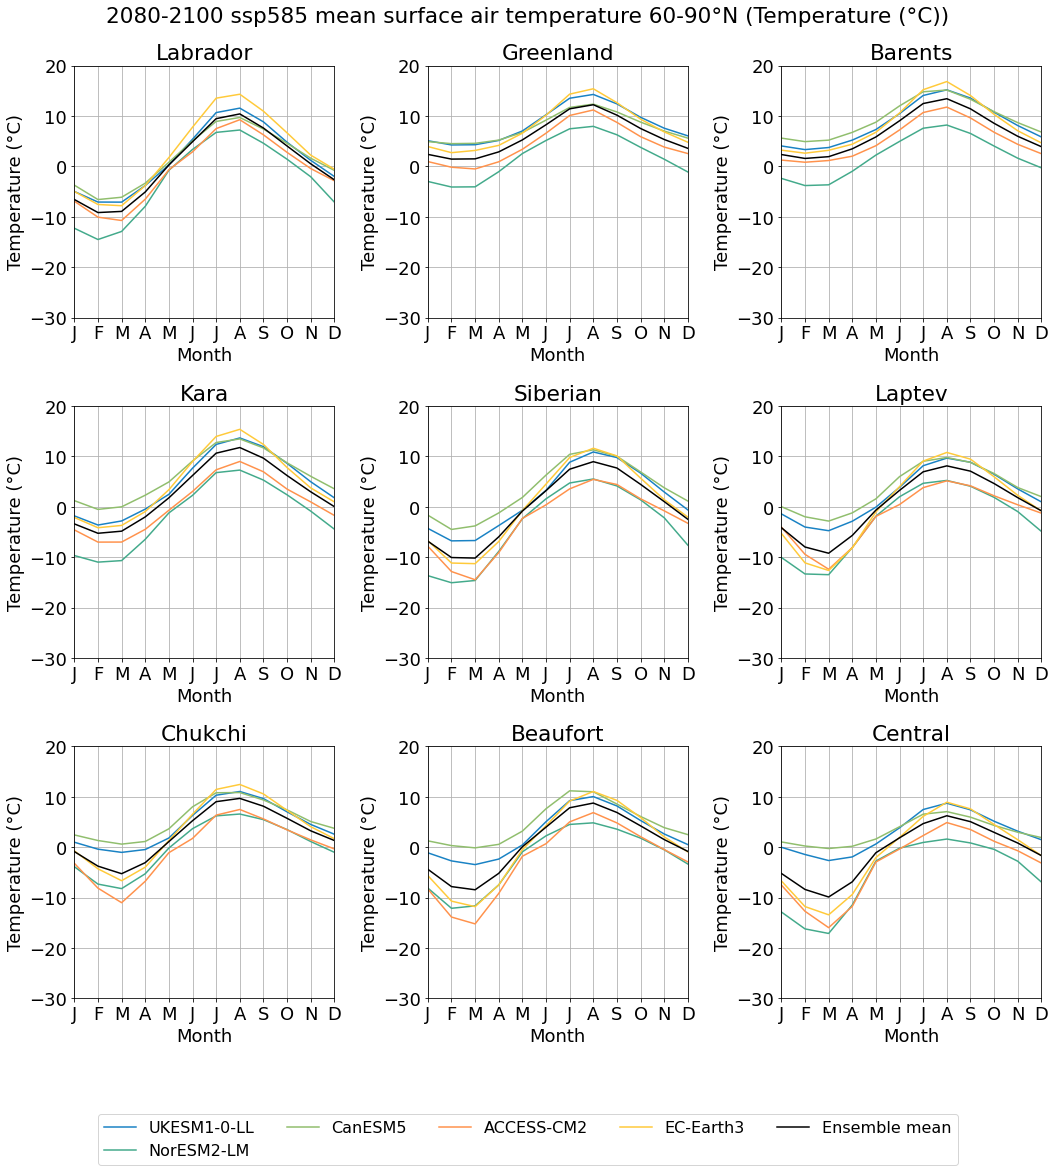

In [10]:
libs.ensemble.monthly_variability_regional(
    ensemble_time_slices,
    plot_kwargs={
        'title': f'{{s_label}} {experiment} mean {time_series_text} 60-90°N ({time_series_y_label})',
        'ylabel': time_series_y_label,
        'yrange': time_series_y_range_monthly
    },
    weight=weight,
    weighting_method=time_series_weighted_method,
    weighting_process=time_series_process
)